<a href="https://colab.research.google.com/github/Chubbyman2/Udacity_Tensorflow_Tutorials/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification**

Classification machine learning models are used for distinguishing among two or more output categories.

In [ ]:
!pip install -U tensorflow_datasets

from __future__ import absolute_import, division, print_function

# Tensorflow
import tensorflow as tf
import tensorflow_datasets as tfds
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Helper Libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

The input images are 2D arrays of 28x28 pixels. You'll need to flatten them to a 1D array of 784 pixels.

The labels 0-9 for each class of clothing will have corresponding output neurons.

In the end, the output neuron with the highest probability will indicate what class of clothing is being shown.

The 10 numbers (which add up to 1) are known as the **probability distribution**.

In [ ]:
# Load Dataset and split into train and test sets
dataset, metadata = tfds.load("fashion_mnist", as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset["train"], dataset["test"]

In [ ]:
# Since class names are not included in the dataset, store them here for later when plotting the images
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

**Explore the data**

Datasets are split into the **training set** and the **testing set**.

This is so we can see how the model performs beyond what it has seen during training, and whether it has actually learned instead of just memorizing the examples.

A **validation dataset** is not used for training, but to test the model during training. It is used to measure the final accuracy of the model.

If loss is being reduced during training but accuracy deteriorates on the validation dataset, it means the model is memorizing the test set.

In [ ]:
num_train_examples = metadata.splits["train"].num_examples
num_test_examples = metadata.splits["test"].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of testing examples: {}".format(num_test_examples))

Number of training examples: 60000
Number of testing examples: 10000


**Preprocess and explore the data**

The value of each pixel is an integer in range [0, 255]. We need to convert these to [0, 1] using a **normalization function**.

In [ ]:
def normalize(images, labels):
  # tf.cast changes pixel values to 32-bit floats
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies normalize() to each element in the datasets
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

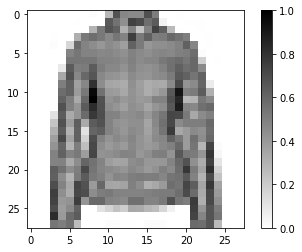

In [ ]:
# Take a single image, remove the colour dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28, 28))

# Plot the image
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

**Build the Model**

The **ReLU** function allows the network to solve nonlinear problems. 

The probability values for the classes are created using the **softmax function**.

All classification neural networks use softmax functions.

In [ ]:
# Setting up the layers
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)), # Input - 28x28x1 array
  tf.keras.layers.Dense(128, activation=tf.nn.relu), # Hidden
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) # Output                            
])

In [ ]:
# Compiling the model
# Will use default learning rate, so "adam" can be passed as a string
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

**Train the Model**

1. dataset.repeat() repeats training forever, only limited by the epochs parameter

2. dataset.shuffle(60000) randomizes the order so our model cannot learn anything from the order of the examples

3. dataset.batch(32) tells model.fit to use batches of 32 images and labels when training

4. Don't worry about steps_per_epoch

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

model.fit(train_dataset, epochs=15, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

**Evaluating Accuracy**

Applies model to test dataset

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print("Accuracy on test dataset: ", test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.3436 - accuracy: 0.8876
Accuracy on test dataset:  0.8876000046730042


**Final Testing**

In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

# Shows the probability distribution across all labels (notice how 4 is the highest)
predictions[0]

array([3.39958001e-06, 3.94066042e-08, 1.15931155e-02, 4.29752482e-08,
       9.60031331e-01, 2.81780501e-08, 2.83597149e-02, 8.72001304e-10,
       1.23248055e-05, 4.67634642e-09], dtype=float32)

In [ ]:
# Shows which index the model believes is the most likely
np.argmax(predictions[0])

4

In [ ]:
# The model is most confident this is a dress, or class_names[4].
# Let's check
test_labels[0]

4

In [ ]:
# Basic code to test the model
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

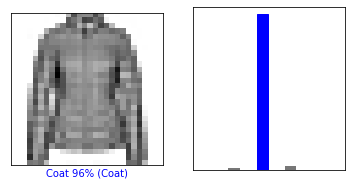

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

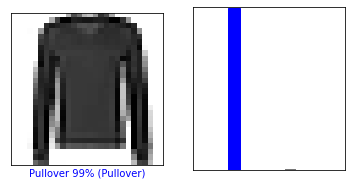

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

![alt text](https://video.udacity-data.com/topher/2019/April/5ca67b6c_table-v3/table-v3.png)